# **Problem Statement**

Our dataset contains data from the US Bureau of Transportation Statistics about the arrival, delay and cancellation of domestic flights from July 2019 to July 2022.

In this project, we will investigate and highlight which airlines and airports have the most delay and cancellation over time.

We will also analyse the causes of the delays and cancellations. At last, we will see whether COVID-19 pandemic had an impact on the overwall flight cancellations.


# **1. Data Exploration**

Our first step is to explore our data with key Pandas commands.

In [73]:
# Mounting our drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# Importing the Pandas library to our script

import pandas as pd

The dataset has 3 CSV files.

In [75]:
# Importing the files

df1=pd.read_csv("/content/drive/MyDrive/wk10_pandas_learner/Resources/Flight Delays/Flights_Delay_Cause_2019-2020.csv")
df2=pd.read_csv("/content/drive/MyDrive/wk10_pandas_learner/Resources/Flight Delays/Flights_Delay_Cause_2020-2021.csv")
df3=pd.read_csv("/content/drive/MyDrive/wk10_pandas_learner/Resources/Flight Delays/Flights_Delay_Cause_2021-2022.csv")

In [76]:
# Exploring the 5 first rows of the dataframe named df1

df1.head()

year  month carrier       carrier_name airport  \
0  2022      7      9E  Endeavor Air Inc.     ABE   
1  2022      7      9E  Endeavor Air Inc.     ABY   
2  2022      7      9E  Endeavor Air Inc.     ACK   
3  2022      7      9E  Endeavor Air Inc.     AEX   
4  2022      7      9E  Endeavor Air Inc.     AGS   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         33.0        2.0   
1             Albany, GA: Southwest Georgia Regional         78.0       25.0   
2                  Nantucket, MA: Nantucket Memorial        124.0       19.0   
3           Alexandria, LA: Alexandria International         67.0       10.0   
4        Augusta, GA: Augusta Regional at Bush Field        174.0       30.0   

   arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
0            0.0           0.0      129.0           98.0           23.0   
1            0.0           0.0     1664.0          887.0           52.0   
2            5.0           4.0     1523.0          388.0           35.0   
3            0.0           1.0      657.0          103.0           82.0   
4            1.0           0.0     2462.0         1686.0          310.0   

   nas_delay  security_delay  delays  
0        8.0             0.0     NaN  
1      224.0             0.0     NaN  
2      511.0             0.0     NaN  
3       93.0            25.0     NaN  
4      139.0             0.0     NaN

The dataset consists of the following columns:

**year:** the year of the flight

**month:** the month of the flight

**carrier:** the 2 letters abbreviation for the airline

**carrier_name:** the complete name of the airline

**airport:** the 3 letters Airport code

**airport_name:** the airport full name

**arr_flights:** number of arrived flights ontime

**arr_del15:** number of delayed flights (flights are considered delayed after 15 minutes of the arrival time)

**arr_cancelled:** number of cancelled flights

**arr_diverted:** number of diverted flights

**arr_delay:** number of delayed flights

**carrier_delay:** number of flights delayed caused by the carrier

**weather_delay:** number of flights delayed caused by the weather

**nas_delay:** number of flighst delayed caused by the National Aviation System

**security_delay:** number of flights delayed due to security issues

In [77]:
# Exploring the 5 last rows of df1

df1.tail()

year  month carrier      carrier_name airport  \
1675  2022      7      YX  Republic Airline     STL   
1676  2022      7      YX  Republic Airline     SYR   
1677  2022      7      YX  Republic Airline     TUL   
1678  2022      7      YX  Republic Airline     TVC   
1679  2022      7      YX  Republic Airline     XNA   

                                       airport_name  arr_flights  arr_del15  \
1675  St. Louis, MO: St Louis Lambert International        131.0       26.0   
1676   Syracuse, NY: Syracuse Hancock International        149.0       35.0   
1677                 Tulsa, OK: Tulsa International         10.0        2.0   
1678              Traverse City, MI: Cherry Capital         98.0       13.0   
1679  Fayetteville, AR: Northwest Arkansas Regional         56.0       13.0   

      arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
1675            6.0           0.0     2054.0          501.0          361.0   
1676            2.0           0.0     2198.0          679.0          139.0   
1677            0.0           0.0      135.0            8.0            0.0   
1678            1.0           0.0      950.0          162.0            0.0   
1679            3.0           0.0     1180.0          120.0            0.0   

      nas_delay  security_delay  delays  
1675      298.0             0.0     NaN  
1676      425.0             0.0     NaN  
1677       11.0             0.0     NaN  
1678      291.0             0.0     NaN  
1679      318.0             0.0     NaN

Since our dataset has 3 CSV files, let's combine all files in one document.

In [78]:
# Let's use the .concat() method

df= pd.concat([df1, df2, df3], ignore_index=True)

# Setting the parameter ignore_index=True will reasign new indexes to the whole dataset, and the intial indexes of each document will be ignored

In [79]:
# Checking how many rows and columns the combined dataset has

df.shape

(42461, 16)

Using the .info() function to check the data types of each column, the number of non-missing values (non-null) and the memory usage.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42461 non-null  int64  
 1   month           42461 non-null  int64  
 2   carrier         42461 non-null  object 
 3   carrier_name    42445 non-null  object 
 4   airport         42461 non-null  object 
 5   airport_name    42461 non-null  object 
 6   arr_flights     42354 non-null  float64
 7   arr_del15       42183 non-null  float64
 8   arr_cancelled   42354 non-null  float64
 9   arr_diverted    42354 non-null  float64
 10  arr_delay       42354 non-null  float64
 11  carrier_delay   42354 non-null  float64
 12  weather_delay   42354 non-null  float64
 13  nas_delay       42354 non-null  float64
 14  security_delay  42354 non-null  float64
 15  delays          0 non-null      float64
dtypes: float64(10), int64(2), object(4)
memory usage: 5.2+ MB


Using the describe() function to run some statistics.

In [81]:
df.describe()

year         month   arr_flights     arr_del15  arr_cancelled  \
count  42461.000000  42461.000000  42354.000000  42183.000000   42354.000000   
mean    2020.096324      6.529521    290.053950     41.470095       9.251641   
std        0.815651      3.341909    836.485771    130.737062      70.613366   
min     2019.000000      1.000000      1.000000      0.000000       0.000000   
25%     2020.000000      4.000000     33.000000      3.000000       0.000000   
50%     2020.000000      7.000000     81.000000     10.000000       0.000000   
75%     2021.000000      9.000000    194.000000     28.000000       3.000000   
max     2022.000000     12.000000  21873.000000   3506.000000    4951.000000   

       arr_diverted      arr_delay  carrier_delay  weather_delay  \
count  42354.000000   42354.000000   42354.000000   42354.000000   
mean       0.624357    2757.859210    1007.217996     177.938495   
std        3.069780    9664.845862    3405.101443     742.131883   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.000000     158.000000      49.000000       0.000000   
50%        0.000000     566.000000     211.000000       0.000000   
75%        0.000000    1737.000000     705.000000      99.000000   
max      154.000000  305694.000000  119425.000000   26428.000000   

           nas_delay  security_delay  delays  
count   42354.000000    42354.000000     0.0  
mean      587.135383        6.496647     NaN  
std      2784.605383       45.371314     NaN  
min         0.000000        0.000000     NaN  
25%         9.000000        0.000000     NaN  
50%        80.000000        0.000000     NaN  
75%       282.000000        0.000000     NaN  
max    200000.000000     3760.000000     NaN

**Note**

The "year" and "month" columns are currently treated as numerical values (floats), which is why they show up in summary statistics when using the describe() function.

To correctly interpret them as dates, they need to be converted to a date datatype using the .to_datetime() method.





# **2. Data Transformation**

Before making any changes, it is a good practice to create a copy of the dataframe to avoid modifying the original dataset, preventing errors that might require restarting the Python interpreter and re-running the script.

In [10]:
df_copy= df.copy(deep=True)

In [11]:
# Checking the dataframe copy

df_copy.head()

year  month carrier       carrier_name airport  \
0  2022      7      9E  Endeavor Air Inc.     ABE   
1  2022      7      9E  Endeavor Air Inc.     ABY   
2  2022      7      9E  Endeavor Air Inc.     ACK   
3  2022      7      9E  Endeavor Air Inc.     AEX   
4  2022      7      9E  Endeavor Air Inc.     AGS   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         33.0        2.0   
1             Albany, GA: Southwest Georgia Regional         78.0       25.0   
2                  Nantucket, MA: Nantucket Memorial        124.0       19.0   
3           Alexandria, LA: Alexandria International         67.0       10.0   
4        Augusta, GA: Augusta Regional at Bush Field        174.0       30.0   

   arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
0            0.0           0.0      129.0           98.0           23.0   
1            0.0           0.0     1664.0          887.0           52.0   
2            5.0           4.0     1523.0          388.0           35.0   
3            0.0           1.0      657.0          103.0           82.0   
4            1.0           0.0     2462.0         1686.0          310.0   

   nas_delay  security_delay  delays  
0        8.0             0.0     NaN  
1      224.0             0.0     NaN  
2      511.0             0.0     NaN  
3       93.0            25.0     NaN  
4      139.0             0.0     NaN

Now, let's create a new column named "date" to store the date which will have the "month" and "year" from our dataset.

Since the data types in both "month" and "year" columns are integers, first we need to change the data types to a string.

In [12]:
# Converting "month" and "year" into a string datatype using the .astype() method

df_copy=df_copy.astype({"month": str, "year":str})
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42461 non-null  object 
 1   month           42461 non-null  object 
 2   carrier         42461 non-null  object 
 3   carrier_name    42445 non-null  object 
 4   airport         42461 non-null  object 
 5   airport_name    42461 non-null  object 
 6   arr_flights     42354 non-null  float64
 7   arr_del15       42183 non-null  float64
 8   arr_cancelled   42354 non-null  float64
 9   arr_diverted    42354 non-null  float64
 10  arr_delay       42354 non-null  float64
 11  carrier_delay   42354 non-null  float64
 12  weather_delay   42354 non-null  float64
 13  nas_delay       42354 non-null  float64
 14  security_delay  42354 non-null  float64
 15  delays          0 non-null      float64
dtypes: float64(10), object(6)
memory usage: 5.2+ MB


Now, let's concatenate our columns "month" and "year" using the "+" sign.

In [13]:
df_copy['date']= df_copy['year']+"-"+df_copy['month']
df_copy.head()

year month carrier       carrier_name airport  \
0  2022     7      9E  Endeavor Air Inc.     ABE   
1  2022     7      9E  Endeavor Air Inc.     ABY   
2  2022     7      9E  Endeavor Air Inc.     ACK   
3  2022     7      9E  Endeavor Air Inc.     AEX   
4  2022     7      9E  Endeavor Air Inc.     AGS   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         33.0        2.0   
1             Albany, GA: Southwest Georgia Regional         78.0       25.0   
2                  Nantucket, MA: Nantucket Memorial        124.0       19.0   
3           Alexandria, LA: Alexandria International         67.0       10.0   
4        Augusta, GA: Augusta Regional at Bush Field        174.0       30.0   

   arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
0            0.0           0.0      129.0           98.0           23.0   
1            0.0           0.0     1664.0          887.0           52.0   
2            5.0           4.0     1523.0          388.0           35.0   
3            0.0           1.0      657.0          103.0           82.0   
4            1.0           0.0     2462.0         1686.0          310.0   

   nas_delay  security_delay  delays    date  
0        8.0             0.0     NaN  2022-7  
1      224.0             0.0     NaN  2022-7  
2      511.0             0.0     NaN  2022-7  
3       93.0            25.0     NaN  2022-7  
4      139.0             0.0     NaN  2022-7

Using the Pandas function .to_datetime() to transform the date into a datetime datatype.

In [14]:
df_copy['date']= pd.to_datetime(df_copy['date'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            42461 non-null  object        
 1   month           42461 non-null  object        
 2   carrier         42461 non-null  object        
 3   carrier_name    42445 non-null  object        
 4   airport         42461 non-null  object        
 5   airport_name    42461 non-null  object        
 6   arr_flights     42354 non-null  float64       
 7   arr_del15       42183 non-null  float64       
 8   arr_cancelled   42354 non-null  float64       
 9   arr_diverted    42354 non-null  float64       
 10  arr_delay       42354 non-null  float64       
 11  carrier_delay   42354 non-null  float64       
 12  weather_delay   42354 non-null  float64       
 13  nas_delay       42354 non-null  float64       
 14  security_delay  42354 non-null  float64       
 15  de

In [15]:
# Checking the dataframe

df_copy.head()

year month carrier       carrier_name airport  \
0  2022     7      9E  Endeavor Air Inc.     ABE   
1  2022     7      9E  Endeavor Air Inc.     ABY   
2  2022     7      9E  Endeavor Air Inc.     ACK   
3  2022     7      9E  Endeavor Air Inc.     AEX   
4  2022     7      9E  Endeavor Air Inc.     AGS   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         33.0        2.0   
1             Albany, GA: Southwest Georgia Regional         78.0       25.0   
2                  Nantucket, MA: Nantucket Memorial        124.0       19.0   
3           Alexandria, LA: Alexandria International         67.0       10.0   
4        Augusta, GA: Augusta Regional at Bush Field        174.0       30.0   

   arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
0            0.0           0.0      129.0           98.0           23.0   
1            0.0           0.0     1664.0          887.0           52.0   
2            5.0           4.0     1523.0          388.0           35.0   
3            0.0           1.0      657.0          103.0           82.0   
4            1.0           0.0     2462.0         1686.0          310.0   

   nas_delay  security_delay  delays       date  
0        8.0             0.0     NaN 2022-07-01  
1      224.0             0.0     NaN 2022-07-01  
2      511.0             0.0     NaN 2022-07-01  
3       93.0            25.0     NaN 2022-07-01  
4      139.0             0.0     NaN 2022-07-01

We can see from the column "data" that we managed to assign datatime as datatype. However, this automatically added a default day number "01".

To resolve this, we need to use an additional function to extract only the month and year in the correct date format.

In [16]:
df_copy['date']= pd.to_datetime(df_copy['date']).dt.to_period('M')

In [17]:
df_copy.head()

year month carrier       carrier_name airport  \
0  2022     7      9E  Endeavor Air Inc.     ABE   
1  2022     7      9E  Endeavor Air Inc.     ABY   
2  2022     7      9E  Endeavor Air Inc.     ACK   
3  2022     7      9E  Endeavor Air Inc.     AEX   
4  2022     7      9E  Endeavor Air Inc.     AGS   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         33.0        2.0   
1             Albany, GA: Southwest Georgia Regional         78.0       25.0   
2                  Nantucket, MA: Nantucket Memorial        124.0       19.0   
3           Alexandria, LA: Alexandria International         67.0       10.0   
4        Augusta, GA: Augusta Regional at Bush Field        174.0       30.0   

   arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
0            0.0           0.0      129.0           98.0           23.0   
1            0.0           0.0     1664.0          887.0           52.0   
2            5.0           4.0     1523.0          388.0           35.0   
3            0.0           1.0      657.0          103.0           82.0   
4            1.0           0.0     2462.0         1686.0          310.0   

   nas_delay  security_delay  delays     date  
0        8.0             0.0     NaN  2022-07  
1      224.0             0.0     NaN  2022-07  
2      511.0             0.0     NaN  2022-07  
3       93.0            25.0     NaN  2022-07  
4      139.0             0.0     NaN  2022-07

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   year            42461 non-null  object   
 1   month           42461 non-null  object   
 2   carrier         42461 non-null  object   
 3   carrier_name    42445 non-null  object   
 4   airport         42461 non-null  object   
 5   airport_name    42461 non-null  object   
 6   arr_flights     42354 non-null  float64  
 7   arr_del15       42183 non-null  float64  
 8   arr_cancelled   42354 non-null  float64  
 9   arr_diverted    42354 non-null  float64  
 10  arr_delay       42354 non-null  float64  
 11  carrier_delay   42354 non-null  float64  
 12  weather_delay   42354 non-null  float64  
 13  nas_delay       42354 non-null  float64  
 14  security_delay  42354 non-null  float64  
 15  delays          0 non-null      float64  
 16  date            42461 non-null  period[M

The "date" column was assigned the "period" datatype, which is another date fromat used in Pandas.

Now that the new column "date" has been successfully created, let's save it in our working folder.

In [19]:
df_copy.to_csv('flights_dataset.csv')

Now, let's remove the unwanted "month" and "year" columns using the medthod .drop():

In [20]:
df_copy=df_copy.drop(['month', 'year'], axis=1)

In [21]:
df_copy.head()

carrier       carrier_name airport  \
0      9E  Endeavor Air Inc.     ABE   
1      9E  Endeavor Air Inc.     ABY   
2      9E  Endeavor Air Inc.     ACK   
3      9E  Endeavor Air Inc.     AEX   
4      9E  Endeavor Air Inc.     AGS   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         33.0        2.0   
1             Albany, GA: Southwest Georgia Regional         78.0       25.0   
2                  Nantucket, MA: Nantucket Memorial        124.0       19.0   
3           Alexandria, LA: Alexandria International         67.0       10.0   
4        Augusta, GA: Augusta Regional at Bush Field        174.0       30.0   

   arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
0            0.0           0.0      129.0           98.0           23.0   
1            0.0           0.0     1664.0          887.0           52.0   
2            5.0           4.0     1523.0          388.0           35.0   
3            0.0           1.0      657.0          103.0           82.0   
4            1.0           0.0     2462.0         1686.0          310.0   

   nas_delay  security_delay  delays     date  
0        8.0             0.0     NaN  2022-07  
1      224.0             0.0     NaN  2022-07  
2      511.0             0.0     NaN  2022-07  
3       93.0            25.0     NaN  2022-07  
4      139.0             0.0     NaN  2022-07

# **3. Data Cleaning**


After exploring our dataset and correcting some of the datatypes, the next step is to clean the dataset.

Let's check how many missing values our dataset has using the isnull() function.

In [22]:
df_copy.isnull().sum()

carrier               0
carrier_name         16
airport               0
airport_name          0
arr_flights         107
arr_del15           278
arr_cancelled       107
arr_diverted        107
arr_delay           107
carrier_delay       107
weather_delay       107
nas_delay           107
security_delay      107
delays            42461
date                  0
dtype: int64

We can check that missing values are present in numerical columns and "carrier_name". Since unidentified carrier names can affect downstream analysis, let's remove these missing values.

In [23]:
df_copy= df_copy.dropna(subset=['carrier_name'])

In [24]:
# We can check now that "carrier_name" don't have any missing values left

df_copy.isnull().sum()

carrier               0
carrier_name          0
airport               0
airport_name          0
arr_flights         107
arr_del15           278
arr_cancelled       107
arr_diverted        107
arr_delay           107
carrier_delay       107
weather_delay       107
nas_delay           107
security_delay      107
delays            42445
date                  0
dtype: int64

Now, let's check the distribution of the data.

In [25]:
# Double-checking the name of the variables

df_copy.columns

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

To check for outliers in numerical columns, we can use the built-in box plot function in Pandas.

<Axes: >

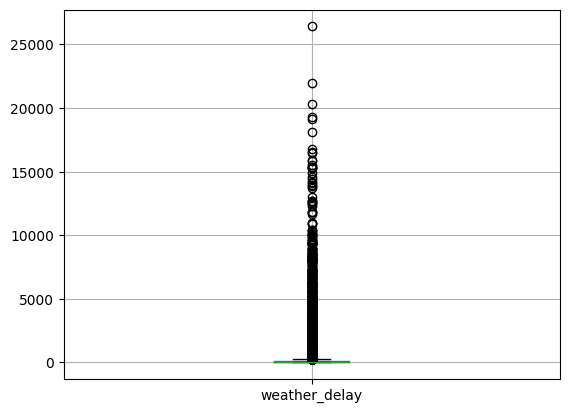

In [26]:
# Applying the .boxplot method to “df_copy”

df_copy.boxplot('weather_delay')

In [27]:
# Let's create a function that will return a box plot

def box_plot(flights):
    return df_copy.boxplot(flights)

<Axes: >

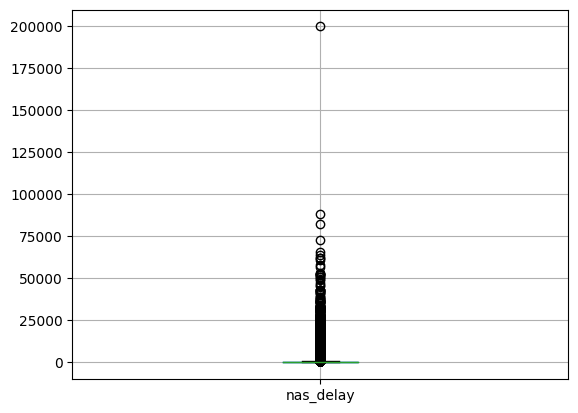

In [28]:
# Now, let's call our function, passing a data variable as argument

box_plot('nas_delay')

In [29]:
# Identifying and removing the row with the outlier

outlier_index= df_copy[df_copy['nas_delay']>175000].index
df_cleaned= df_copy.drop(outlier_index)

In [30]:
# Using the .index attribute to get the row number of our outlier

outlier_index

Index([363], dtype='int64')

<Axes: >

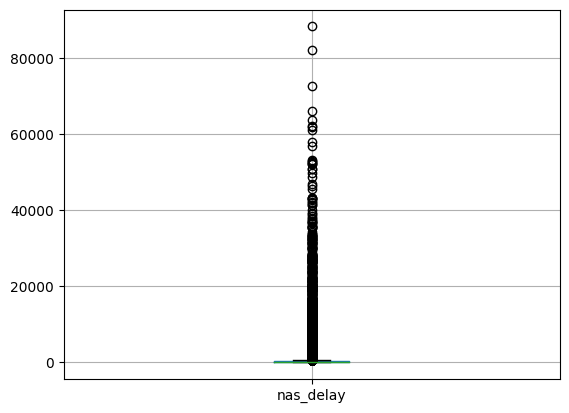

In [31]:
# Checking if the outlier has been removed.

df_cleaned.boxplot('nas_delay')

Let's import now the Python Matplotlib visualisation library.

In [32]:
import matplotlib.pyplot as plt

In [33]:
def subplot_function(data1, data2):  # Define a function that takes two data variables as arguments

    figure, ax = plt.subplots(nrows=2, ncols=1)  # Create a subplot layer with 2 rows and 1 column

    # Calculate min, mean, median, and max values for data1
    min_val = df_cleaned[data1].min()
    max_val = df_cleaned[data1].max()
    mean_val = df_cleaned[data1].mean()
    med_val = df_cleaned[data1].median()

    # Create reference lines for data1
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2, label='Min')
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=max_val, color='blue', linestyle='dashed', linewidth=2, label='Max')
    ax[0].legend()  # Display the legend

    # Create histogram for data1 in the first subplot
    ax[0].set_ylabel('Frequency')  # Set y-axis label
    df_cleaned.hist(data1, ax=ax[0], bins=10, color="purple")

    # Create boxplot for data2 in the second subplot
    ax[1].set_xlabel('')  # Remove x-axis label
    ax[1].set_ylabel('Frequency')  # Set y-axis label
    df_cleaned.boxplot(data2, ax=ax[1], color="blue")

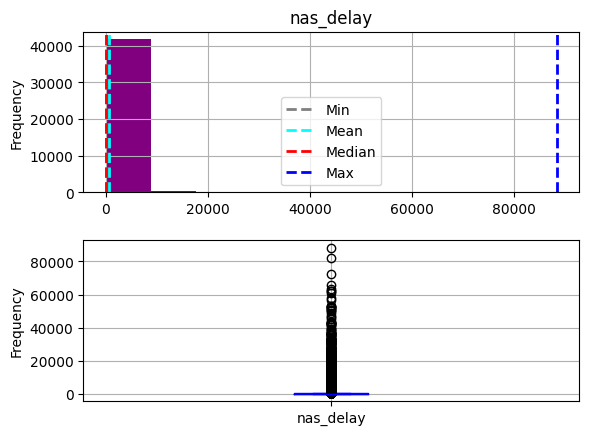

In [34]:
subplot_function('nas_delay',"nas_delay")

# **4. Data Analysis**

### 4.1. Which airlines have the most delayed flights?

Let's group the airline data and calculate the average of delayed flights per airline.

In [35]:
df_delays=df_cleaned.groupby(by="carrier_name", as_index=False)

In [36]:
df_delays.size()

carrier_name  size
0      Alaska Airlines Inc.  1851
1             Allegiant Air  3158
2    American Airlines Inc.  2574
3      Delta Air Lines Inc.  3212
4         Endeavor Air Inc.  2720
5                 Envoy Air  3655
6   ExpressJet Airlines LLC  1161
7    Frontier Airlines Inc.  2499
8    Hawaiian Airlines Inc.   435
9               Horizon Air   383
10          JetBlue Airways  1541
11       Mesa Airlines Inc.  2576
12        PSA Airlines Inc.  2331
13         Republic Airline  2240
14    SkyWest Airlines Inc.  6055
15   Southwest Airlines Co.  2406
16         Spirit Air Lines  1286
17    United Air Lines Inc.  2361

Now, let's calculate the mean of the delayed flights per airline.

In [37]:
df_delays=df_delays["arr_del15"].mean()

In [38]:
df_delays

carrier_name   arr_del15
0      Alaska Airlines Inc.   31.467820
1             Allegiant Air   15.350775
2    American Airlines Inc.   90.818217
3      Delta Air Lines Inc.   56.543136
4         Endeavor Air Inc.   19.188427
5                 Envoy Air   23.282030
6   ExpressJet Airlines LLC   18.713537
7    Frontier Airlines Inc.   18.742065
8    Hawaiian Airlines Inc.   26.290323
9               Horizon Air   22.976501
10          JetBlue Airways   56.828776
11       Mesa Airlines Inc.   23.320392
12        PSA Airlines Inc.   32.399742
13         Republic Airline   34.889739
14    SkyWest Airlines Inc.   33.051461
15   Southwest Airlines Co.  127.741895
16         Spirit Air Lines   46.170713
17    United Air Lines Inc.   59.114286

Let's plot the data using the Matplotlib and Seaborn visualisation libraries.

In [39]:
# Importing both libraries

import matplotlib.pyplot as plt
import seaborn as sns

Before plotting, let's sort df_delays based on the values in the column "arr_del15" in descending order.

In [40]:
df_delays=df_delays.sort_values(by=["arr_del15"], ascending=False)

Let's also create a new dataframe named df4 that is a sorted version of df_cleaned with the rows arranged in descending order based on the values in the "arr_del15" column.


In [41]:
df4=df_cleaned.sort_values(by=["arr_del15"], ascending=False)

Now, let's star plotting.

<ipython-input-42-2c7b1cf843c6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df4, x="arr_del15", y="carrier_name", color="mediumpurple", ci=None)


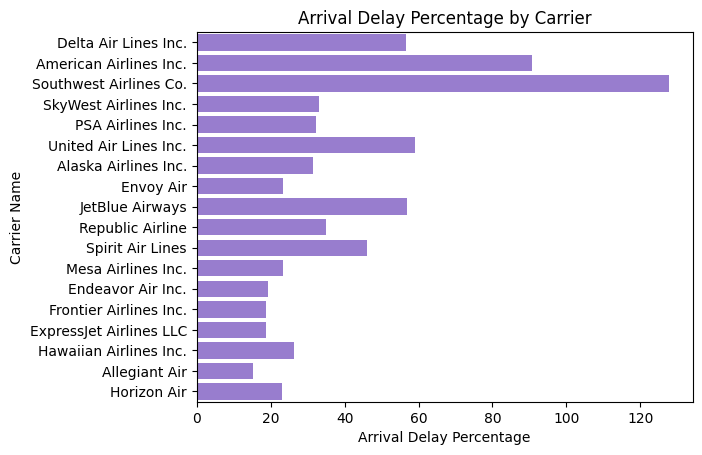

In [42]:
# Creating a bar plot
sns.barplot(data=df4, x="arr_del15", y="carrier_name", color="mediumpurple", ci=None)

# Customising the plot
plt.title("Arrival Delay Percentage by Carrier")
plt.xlabel("Arrival Delay Percentage")
plt.ylabel("Carrier Name")

# Show the plot
plt.show()

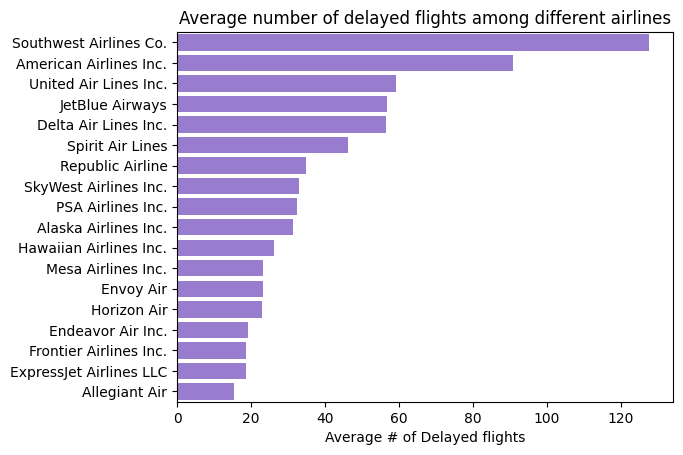

In [43]:
sns.barplot(data=df_delays, x="arr_del15", y="carrier_name", color="mediumpurple",errorbar=None) # Different parameters are added to the varplot function (color, graph orientation)
plt.title("Average number of delayed flights among different airlines")  # Adding a title to the graph
plt.ylabel("") # Changing the y axis label
plt.xlabel("Average # of Delayed flights") # Changing the x axis label

plt.show()

The above plot shows that Southwest Airlines Co. has the most delayed flights compared to the other airlines.

### 4.2. Which airline is the most affected by both delayed and cancelled flights?

In [44]:
# Grouping the dataframe by carrier name, keeping carrier name as a column
df_delays_carrier = df_cleaned.groupby(by="carrier_name", as_index=False)

# Calculating mean values for "arr_del15" and "arr_cancelled" columns for each carrier
df_delays_carrier = df_delays_carrier[["arr_del15", "arr_cancelled"]].mean()

# Displaying the resulting dataframe
df_delays_carrier

carrier_name   arr_del15  arr_cancelled
0      Alaska Airlines Inc.   31.467820       4.393514
1             Allegiant Air   15.350775       5.340089
2    American Airlines Inc.   90.818217      19.720171
3      Delta Air Lines Inc.   56.543136      10.099874
4         Endeavor Air Inc.   19.188427       3.935543
5                 Envoy Air   23.282030       5.369732
6   ExpressJet Airlines LLC   18.713537       5.384014
7    Frontier Airlines Inc.   18.742065       2.908764
8    Hawaiian Airlines Inc.   26.290323       5.204598
9               Horizon Air   22.976501       3.775457
10          JetBlue Airways   56.828776       7.290720
11       Mesa Airlines Inc.   23.320392       5.483177
12        PSA Airlines Inc.   32.399742       8.195708
13         Republic Airline   34.889739       8.319120
14    SkyWest Airlines Inc.   33.051461       6.289242
15   Southwest Airlines Co.  127.741895      41.722776
16         Spirit Air Lines   46.170713       4.875583
17    United Air Lines Inc.   59.114286      12.208068

In [45]:
# Setting the "carrier_name" column as the index of the dataframe
df_delays_carrier = df_delays_carrier.set_index("carrier_name")

# Displaying the resulting dataframe
print(df_delays_carrier)

                          arr_del15  arr_cancelled
carrier_name                                      
Alaska Airlines Inc.      31.467820       4.393514
Allegiant Air             15.350775       5.340089
American Airlines Inc.    90.818217      19.720171
Delta Air Lines Inc.      56.543136      10.099874
Endeavor Air Inc.         19.188427       3.935543
Envoy Air                 23.282030       5.369732
ExpressJet Airlines LLC   18.713537       5.384014
Frontier Airlines Inc.    18.742065       2.908764
Hawaiian Airlines Inc.    26.290323       5.204598
Horizon Air               22.976501       3.775457
JetBlue Airways           56.828776       7.290720
Mesa Airlines Inc.        23.320392       5.483177
PSA Airlines Inc.         32.399742       8.195708
Republic Airline          34.889739       8.319120
SkyWest Airlines Inc.     33.051461       6.289242
Southwest Airlines Co.   127.741895      41.722776
Spirit Air Lines          46.170713       4.875583
United Air Lines Inc.     59.11

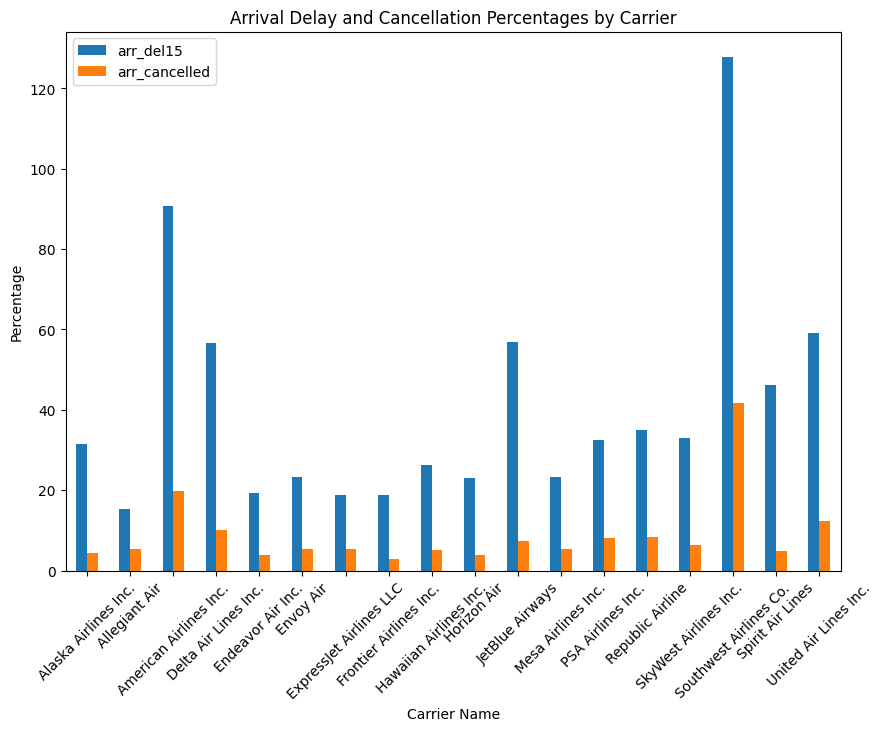

In [46]:
# Creating a bar plot showing arrival delay and cancellation percentages by carrier
df_delays_carrier.plot(kind="bar", figsize=(10, 7))

# Customising the plot
plt.title("Arrival Delay and Cancellation Percentages by Carrier")
plt.xlabel("Carrier Name")
plt.ylabel("Percentage")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

Southwest Arilines Co. has also the most cancellation compared to the other carriers. Let's investigate what could be the cause based on the data we have.

### 4.3. What are the main cause of flights cancellations and delays for the company Southwest Airlines Co.?

 Let's search for the company name in "carrier_name" column and isolate all columns related to that carrier.

In [47]:
df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")

0        False
1        False
2        False
3        False
4        False
         ...  
42456    False
42457    False
42458    False
42459    False
42460    False
Name: carrier_name, Length: 42444, dtype: bool

In [48]:
# This line creates a new DataFrame named df_SW_airline

df_SW_airline=df_cleaned[df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")]

In [49]:
df_SW_airline.head()

carrier            carrier_name airport  \
1409      WN  Southwest Airlines Co.     ABQ   
1410      WN  Southwest Airlines Co.     ALB   
1411      WN  Southwest Airlines Co.     AMA   
1412      WN  Southwest Airlines Co.     ATL   
1413      WN  Southwest Airlines Co.     AUS   

                                           airport_name  arr_flights  \
1409  Albuquerque, NM: Albuquerque International Sun...        687.0   
1410                   Albany, NY: Albany International        293.0   
1411  Amarillo, TX: Rick Husband Amarillo International        200.0   
1412  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2718.0   
1413       Austin, TX: Austin - Bergstrom International       3046.0   

      arr_del15  arr_cancelled  arr_diverted  arr_delay  carrier_delay  \
1409      226.0            6.0           1.0    12541.0         4255.0   
1410       80.0            6.0           0.0     5679.0         2147.0   
1411       48.0            4.0           0.0     2940.0         1033.0   
1412      875.0           25.0           8.0    51674.0        16615.0   
1413      874.0           23.0           4.0    47176.0        16714.0   

      weather_delay  nas_delay  security_delay  delays     date  
1409           66.0      720.0            60.0     NaN  2022-07  
1410          126.0      116.0            19.0     NaN  2022-07  
1411           35.0      128.0             0.0     NaN  2022-07  
1412         1812.0     6030.0            52.0     NaN  2022-07  
1413         1228.0     4232.0           234.0     NaN  2022-07

In [50]:
# This line confirms we have correctly isolated one carrier only

df_SW_airline["carrier_name"].value_counts()

carrier_name
Southwest Airlines Co.    2406
Name: count, dtype: int64

In [51]:
df_SW_airline.keys()

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

In [52]:
df_SW_airline.head()

carrier            carrier_name airport  \
1409      WN  Southwest Airlines Co.     ABQ   
1410      WN  Southwest Airlines Co.     ALB   
1411      WN  Southwest Airlines Co.     AMA   
1412      WN  Southwest Airlines Co.     ATL   
1413      WN  Southwest Airlines Co.     AUS   

                                           airport_name  arr_flights  \
1409  Albuquerque, NM: Albuquerque International Sun...        687.0   
1410                   Albany, NY: Albany International        293.0   
1411  Amarillo, TX: Rick Husband Amarillo International        200.0   
1412  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2718.0   
1413       Austin, TX: Austin - Bergstrom International       3046.0   

      arr_del15  arr_cancelled  arr_diverted  arr_delay  carrier_delay  \
1409      226.0            6.0           1.0    12541.0         4255.0   
1410       80.0            6.0           0.0     5679.0         2147.0   
1411       48.0            4.0           0.0     2940.0         1033.0   
1412      875.0           25.0           8.0    51674.0        16615.0   
1413      874.0           23.0           4.0    47176.0        16714.0   

      weather_delay  nas_delay  security_delay  delays     date  
1409           66.0      720.0            60.0     NaN  2022-07  
1410          126.0      116.0            19.0     NaN  2022-07  
1411           35.0      128.0             0.0     NaN  2022-07  
1412         1812.0     6030.0            52.0     NaN  2022-07  
1413         1228.0     4232.0           234.0     NaN  2022-07

In [53]:
# Selecting only the columns related to causes of delay

df_SW_subset=df_SW_airline[["carrier_delay","weather_delay","nas_delay","security_delay"]]

In [54]:
df_SW_subset.head()

carrier_delay  weather_delay  nas_delay  security_delay
1409         4255.0           66.0      720.0            60.0
1410         2147.0          126.0      116.0            19.0
1411         1033.0           35.0      128.0             0.0
1412        16615.0         1812.0     6030.0            52.0
1413        16714.0         1228.0     4232.0           234.0

In [55]:
# Creating new columns to get the sum of all delay causes

carrier_delay_tot=df_SW_subset["carrier_delay"].sum()
weather_delay_tot=df_SW_subset["weather_delay"].sum()
nas_delay_tot=df_SW_subset["nas_delay"].sum()
security_delay_tot=df_SW_subset["security_delay"].sum()

print(carrier_delay_tot)
print(weather_delay_tot)
print(nas_delay_tot)
print(security_delay_tot)

5518974.0
441728.0
2542425.0
48830.0


In [56]:
data=[carrier_delay_tot,weather_delay_tot,nas_delay_tot,security_delay_tot]

In [57]:
data

[5518974.0, 441728.0, 2542425.0, 48830.0]

In [58]:
# Creating a new dataframe containing only the sum of each delay causes

df_cause=pd.DataFrame(data)
df_cause

0
0  5518974.0
1   441728.0
2  2542425.0
3    48830.0

In [59]:
df_cause=pd.DataFrame(data,index=["carrier", "weather", "nas", "security"], columns=["causes"])
df_cause

causes
carrier   5518974.0
weather    441728.0
nas       2542425.0
security    48830.0

Let’s now import the interactive visualization libraries Plotly and Kleido, which are part of the Dash framework.

In [60]:
!pip install dash --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 72.4 MB/s eta 0:00:00


In [61]:
import dash

print(dash.__version__)

2.17.1


In [62]:
!pip show plotly

Name: plotly
Version: 5.15.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, tenacity
Required-by: cufflinks, dash, datascience, geemap


In [63]:
import plotly.express as px

In [64]:
# Sorting the data before plotting

sorted_df= df_cause.sort_values(by='causes',ascending=False)
sorted_df

causes
carrier   5518974.0
nas       2542425.0
weather    441728.0
security    48830.0

In [65]:
figure= px.bar(sorted_df, title="Causes of flights cancellations and delays of the Southwest Airlines Co. from 2019-2022")
figure.update_xaxes(title='')
figure.update_yaxes(title='')

figure.show()

### 4.4. What are the main cause of flights cancellation and delays among the different airlines?

In [67]:
df_cause_airlines=df_cleaned.groupby(by="carrier_name", as_index=True)[["carrier_delay","weather_delay","nas_delay", "security_delay"]].mean()

In [68]:
df_cause_airlines.head()

carrier_delay  weather_delay    nas_delay  \
carrier_name                                                        
Alaska Airlines Inc.       489.294595      45.616757   470.972973   
Allegiant Air              387.435719      79.325522   188.015833   
American Airlines Inc.    2414.164011     346.050525  1215.510688   
Delta Air Lines Inc.      1622.915829     207.202261   887.169598   
Endeavor Air Inc.          500.519337     112.360958   329.980479   

                        security_delay  
carrier_name                            
Alaska Airlines Inc.         12.560541  
Allegiant Air                 4.800507  
American Airlines Inc.       17.385931  
Delta Air Lines Inc.          7.716709  
Endeavor Air Inc.             0.893554

In [69]:
figure2 = px.bar(df_cause_airlines, title="Causes of flights cancelation and delay")
figure2.update_layout(xaxis_title="Airlines", yaxis_title="", legend_title="causes")
figure2.show()

### 4.5. Does COVID-19 pandemic have an effect on flight delays and cancelations?

In [70]:
df_cleaned.keys()

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<Axes: title={'center': 'Number of canceled flights during 2019 to 2022'}, xlabel='date', ylabel='# of Cancelled flights'>

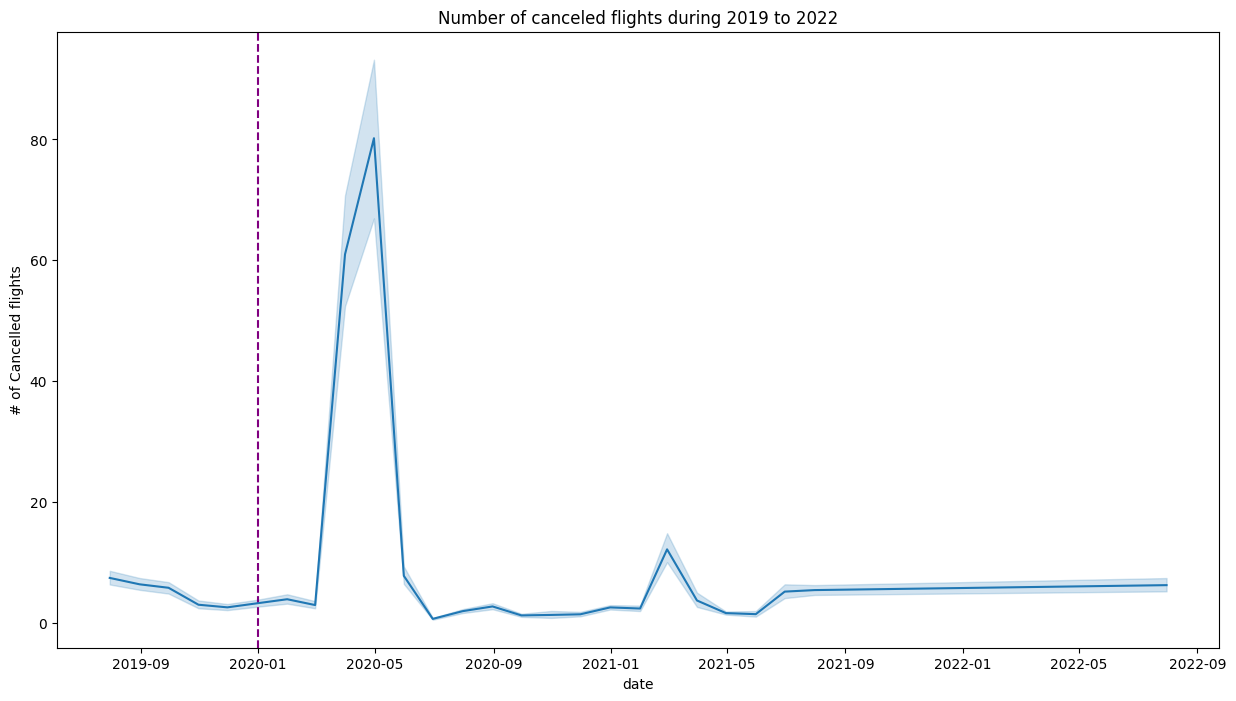

In [72]:
plt.figure(figsize = (15,8))
plt.axvline(pd.Timestamp('2020-01-01'),color='purple',linestyle='--' )
plt.title("Number of canceled flights during 2019 to 2022")
plt.ylabel("# of Cancelled flights")
sns.lineplot(data=df_cleaned,x = "date", y = "arr_cancelled")

The image above shows a sharp increase in flight cancellations just after the surge of the COVID-19 pandemic (indicated by the purple dashed line) and the subsequent lockdowns that affected airline operations.